In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Understanding

## Loading data from the csv files

In [2]:
data_bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression = 'gzip')

In [3]:
# summary of what the data entails
data_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
data_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
data_bom.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [6]:
# numerical and statistical description of the data 
data_bom.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


## Loading data from the zipped file from imdb

In [7]:
imdb = sqlite3.connect("zippedData/im.db/im.db" )
imdb

In [8]:
cur = imdb.cursor()
cur.execute("""
SELECT name 
FROM sqlite_master 
WHERE type = 'table';
""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [9]:
# Overview of the table in the imdb dataset
pd.read_sql("""
SELECT *
FROM 'movie_basics';
""",imdb).head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [10]:
pd.read_sql("""
SELECT *
FROM 'movie_ratings';
""",imdb).head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [11]:
pd.read_sql("""
SELECT *
FROM 'directors';
""",imdb).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [12]:
pd.read_sql("""
SELECT *
FROM 'known_for';
""",imdb).head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [13]:
pd.read_sql("""
SELECT *
FROM 'movie_akas';
""",imdb).head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [14]:
pd.read_sql("""
SELECT *
FROM 'writers';
""",imdb).head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [15]:
pd.read_sql("""
SELECT *
FROM 'persons';
""",imdb).head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [16]:
pd.read_sql("""
SELECT *
FROM 'principals';
""",imdb).head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


## Data Preparation

In [17]:
# join the movie_basics and movie_ratings to help draw insights
imdb_join = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
""",imdb)
imdb_join.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [18]:
imdb_join.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


## DATA CLEANING

#### Data Cleaning in the Bom Dataset

Check for null values in the bom dataset

In [19]:
#there are null values
data_bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [20]:
def to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df[column_list]

In [21]:
to_numeric(data_bom, 'foreign_gross')

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3387, dtype: float64

In [22]:
# Finding the mode of the foreign gross column in the bom dataset
foreign_gross_mode = data_bom.foreign_gross.mode()
foreign_gross_mode

0    1200000.0
Name: foreign_gross, dtype: float64

In [23]:
# Finding the median of the foreign gross column in the bom dataset
foreign_gross_median= data_bom.foreign_gross.median()
foreign_gross_median

18900000.0

In [24]:
# Finding the mean of the foreign gross column in the bom dataset
foreign_gross_mean = data_bom.foreign_gross.mean()
foreign_gross_mean

75057041.62549213

In [25]:
# Finding the mode of the domestic gross column in the bom dataset
domestic_gross_mode = data_bom.domestic_gross.mode()
domestic_gross_mode

0    1100000.0
Name: domestic_gross, dtype: float64

In [26]:
# Replace the null foreign gross with the median
data_bom.foreign_gross.fillna(foreign_gross_median, inplace=True)

In [27]:
# Finding the median of the domestic gross column in the bom dataset
domestic_gross_median = data_bom.domestic_gross.median()
domestic_gross_median

1400000.0

In [28]:
# Finding the mode of the domestic gross column in the bom dataset
domestic_gross_mean = data_bom.domestic_gross.mean()
domestic_gross_mean

28745845.06698422

In [29]:
# Replace the null foreign gross with the median
data_bom.domestic_gross.fillna(domestic_gross_median, inplace=True)

In [30]:
data_bom.isnull().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [31]:
# drop the remaining null values
data_bom.dropna(inplace = True)

In [32]:
# Are there any null values remaining?
data_bom.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Finding outliers in the bom dataset

In [33]:
# Finding outliers in the bom dataset
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [34]:
find_outliers(data_bom.domestic_gross).count()

408

In [35]:
find_outliers(data_bom.foreign_gross).count()

619

In [36]:
# there are no duplicated values in the dataset
data_bom.duplicated().sum()

0

#### Data Cleaning the imdb set

In [37]:
imdb_join.columns = imdb_join.columns.str.lower().str.replace('averagerating', 'average_rating')
imdb_join.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77


In [38]:
imdb_join.columns = imdb_join.columns.str.lower().str.replace('numvotes', 'num_votes')
imdb_join.head(1)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77


Check if there are null values in the dataset

In [39]:
imdb_join.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
average_rating        0
num_votes             0
dtype: int64

In [40]:
# There are null values in the runtime minutes and genres columns
imdb_join.shape

(73856, 8)

In [41]:
# Replace the missing values in the genres column with 'Missing'
imdb_join['genres'].fillna('Missing', inplace=True)

In [42]:
# Drop the remaining missing values in the runtime minutes
imdb_join.dropna(inplace=True)

In [43]:
imdb_join.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
average_rating     0
num_votes          0
dtype: int64

In [44]:
# there are no duplicated values in the dataset
imdb_join.duplicated().sum()

0

In [45]:
# Find if there are any outliers
find_outliers(imdb_join).count()

C:\Users\HP\AppData\Local\Temp\ipykernel_15080\2142825217.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
average_rating      1327
num_votes          10472
dtype: int64

## DATA ANALYSIS

## Exploratory Data Analysis

### 1.UNIVARIATE Data Analysis

#### Data Analysis of the BOM dataset

In [46]:
data_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


Plotting boxplots for outliers

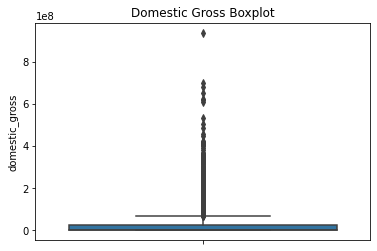

In [47]:

fig, ax = plt.subplots()
sns.boxplot(y = data_bom['domestic_gross'])
ax.set_title('Domestic Gross Boxplot')
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

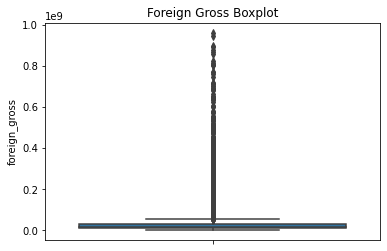

In [48]:

fig, ax = plt.subplots()
sns.boxplot(y = data_bom['foreign_gross'])
ax.set_title('Foreign Gross Boxplot')
plt.show()

# From the boxplots below it can be seen that there are a lot of outliers.

In [49]:
print("Domestic Gross outliers are " + str(find_outliers(data_bom.domestic_gross).count()))
print("Foreign Gross outliers are " + str(find_outliers(data_bom.foreign_gross).count()))

Domestic Gross outliers are 408
Foreign Gross outliers are 619


From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

In [50]:
studios_movies = data_bom.studio.value_counts().head(10)
studios_movies

IFC      166
Uni.     147
WB       140
Fox      136
Magn.    136
SPC      123
Sony     110
BV       106
LGF      103
Par.     101
Name: studio, dtype: int64

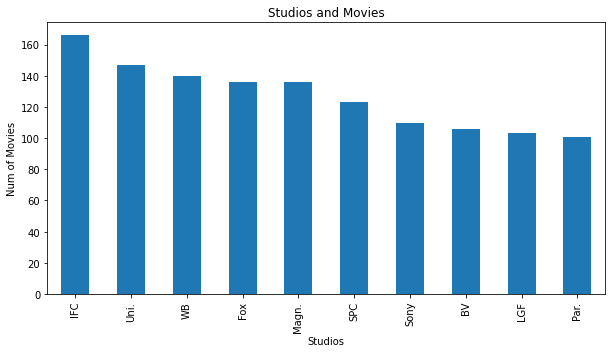

In [51]:
fig, ax = plt.subplots( figsize = (10,5))
ax.set_title("Studios and Movies")
plt.xlabel("Studios")
plt.ylabel("Num of Movies")
studios_movies.plot.bar();

Microsoft must understand its rivals and how to navigate and penetrate the market if it wants to succeed in the movie business.
Here, we observe that Universal and IFC Film Company make the most movies.

In [52]:
# Studios and Domestic Gross and Foreign Gross


#### Measures of Central Tendencies

In [53]:
#mean
print('The domestic gross mean is: ' + str(data_bom.domestic_gross.mean()))
print('The foreign gross mean is: ' + str(data_bom.foreign_gross.mean()))

# 

The domestic gross mean is: 28561064.15730337
The foreign gross mean is: 52623864.15819042


In [54]:
# mode
print('The domestic gross mode is: ' + str(data_bom.domestic_gross.mode()))
print('The foreign gross mode is: ' + str(data_bom.foreign_gross.mode()))
print('The modal studio is: ' + str(data_bom.studio.mode()))
print('The modal title is: ' + str(data_bom.title.mode()))
print('The modal year is: ' + str(data_bom.year.mode()))

# 

The domestic gross mode is: 0    1400000.0
Name: domestic_gross, dtype: float64
The foreign gross mode is: 0    18900000.0
Name: foreign_gross, dtype: float64
The modal studio is: 0    IFC
Name: studio, dtype: object
The modal title is: 0    Bluebeard
Name: title, dtype: object
The modal year is: 0    2015
Name: year, dtype: int64


In [55]:
# median
print('The domestic gross median is: ' + str(data_bom.domestic_gross.median()))
print('The foreign gross median is: ' + str(data_bom.foreign_gross.median()))

# 

The domestic gross median is: 1400000.0
The foreign gross median is: 18900000.0


In [56]:
# range
print('The range of domestic gross is :' + str((data_bom.domestic_gross.max() - data_bom.domestic_gross.min())))
print('The range of domestic gross is :' + str((data_bom.foreign_gross.max() - data_bom.foreign_gross.min())))

#

The range of domestic gross is :936699900.0
The range of domestic gross is :960499400.0


In [57]:
# Standard Deviation
print('The standard deviation of the Domestic gross is: ' + str(data_bom.domestic_gross.std()))
print('The standard deviation of the Foreign gross is: ' + str(data_bom.foreign_gross.std()))

##

The standard deviation of the Domestic gross is: 66791614.60103198
The standard deviation of the Foreign gross is: 110074384.7187505


In [58]:
# Variance
print('The variance of the Domestic gross is: ' + str(data_bom.domestic_gross.var()))
print('The variance of the Foreign gross is: ' + str(data_bom.foreign_gross.var()))

##

The variance of the Domestic gross is: 4461119781012789.0
The variance of the Foreign gross is: 1.2116370171211496e+16


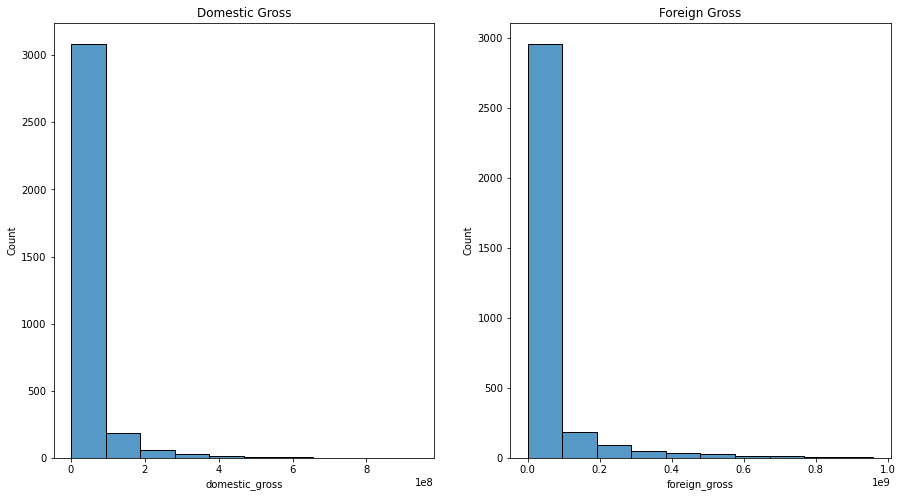

In [59]:
# Plotting Histogram to show the above

n_bins = 10

fig, (ax1,ax2) = plt.subplots(1,2, figsize= (15,8))

sns.histplot(data_bom.domestic_gross, ax=ax1, bins= n_bins)
ax1.set_title('Domestic Gross')
sns.histplot(data_bom.foreign_gross, ax=ax2, bins= n_bins)
ax2.set_title('Foreign Gross');

## From the histogram we can see that the data is right skewed and the distribution has a heavy tail and a higher peak
# and a positive kurtosis

#### Data Analysis of the imdb dataset

In [60]:
imdb_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           66236 non-null  object 
 6   average_rating   66236 non-null  float64
 7   num_votes        66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [61]:
imdb_join.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [62]:
# Find if there are any outliers
find_outliers(imdb_join).count()

## From the below results, there are many outliers and we can't replace because might be affect our data analysis substantially 

C:\Users\HP\AppData\Local\Temp\ipykernel_15080\2142825217.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]


movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes     3588
genres                 0
average_rating      1327
num_votes          10472
dtype: int64

In [63]:
# The genres that are produced the most?
imdb_join.genres.value_counts().head()

Drama           10189
Documentary      9149
Comedy           4604
Comedy,Drama     2451
Horror           2232
Name: genres, dtype: int64

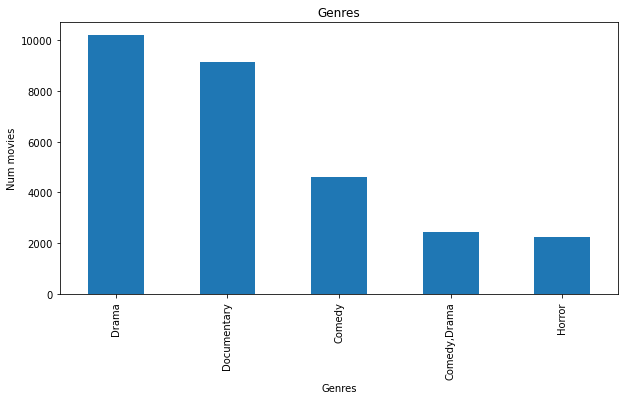

In [64]:
fig, ax = plt.subplots( figsize = (10,5))
imdb_join.genres.value_counts().head().plot.bar()
ax.set_title("Genres")
plt.xlabel("Genres")
plt.ylabel("Num movies");

## Drama, Documentary, Comedy genres are produced the most

In [65]:
# the titles with the highest ratings
sorted_rating = imdb_join.sort_values('average_rating', ascending = False)
sorted_rating
## The genres with the highest ratings are Documentaries with ratings of 10.0

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,average_rating,num_votes
50085,tt4960818,Revolution Food,Revolution Food,2015,70.0,Documentary,10.0,8
64646,tt6991826,A Dedicated Life: Phoebe Brand Beyond the Group,A Dedicated Life: Phoebe Brand Beyond the Group,2015,93.0,Documentary,10.0,5
71577,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary,10.0,5
60782,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary,10.0,5
53689,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary,10.0,5
...,...,...,...,...,...,...,...,...
69012,tt7926296,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama,1.0,17
14521,tt1976600,Pick the Youth,Pi ke qing chun,2011,85.0,Drama,1.0,436
70402,tt8313262,Glaza i mir. Chast 1,Glaza i mir. Chast 1,2018,90.0,Drama,1.0,20
58364,tt6010140,Desu foresuto kyofu no mori 5,Desu foresuto kyofu no mori 5,2016,65.0,Horror,1.0,230


#### Measures of Central Tendency

In [69]:
imdb_join.describe()

,start_year,runtime_minutes,average_rating,num_votes
count,66236.000000,66236.000000,66236.000000,6.623600e+04
mean,2014.252687,94.654040,6.321925,3.924085e+03
std,2.600352,208.574111,1.458443,3.196486e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.100000e+01
75%,2016.000000,104.000000,7.300000,3.470000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [72]:
# mean
print("The average run time minutes of a movie is: " + str(imdb_join.runtime_minutes.mean()))
print("The average number of votes is: " + str(imdb_join.num_votes.mean()))


## The average time that movies run for is 95 minutes

The average run time minutes of a movie is: 94.6540400990398
The average number of votes is: 3924.0854067274595


In [77]:
# mode 
print("The modal run time minutes of movies is: " + str(imdb_join.runtime_minutes.mode()))
print("The modal rating is: " + str(imdb_join.average_rating.mode()))
print("The modal genre is: " + str(imdb_join.genres.mode()))

## The common genre is Drama
## The common rating that was made from the movies is 7.0

The modal run time minutes of movies is: 0    90.0
Name: runtime_minutes, dtype: float64
The modal rating is: 0    7.0
Name: average_rating, dtype: float64
The modal genre is: 0    Drama
Name: genres, dtype: object


### 2. Bivariate Analysis

In [79]:
# Correlation of the runtime minutes and number of votes
imdb_join.num_votes.corr(imdb_join.runtime_minutes, method="pearson")

## There is weak positive correlation

0.012472154480321103

In [80]:
# Correlation of the average rating and number of votes
imdb_join.average_rating.corr(imdb_join.num_votes, method="pearson")

## There is a weak positive correlation

0.04849374090735336